<a href="https://colab.research.google.com/github/caalr11/FisicaComputacional1/blob/master/Evaluacion3/Evaluacion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EVALUACION 3

CARLOS ANDRES ARIAS LOPEZ REYES

PROBLEMA 1

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

True


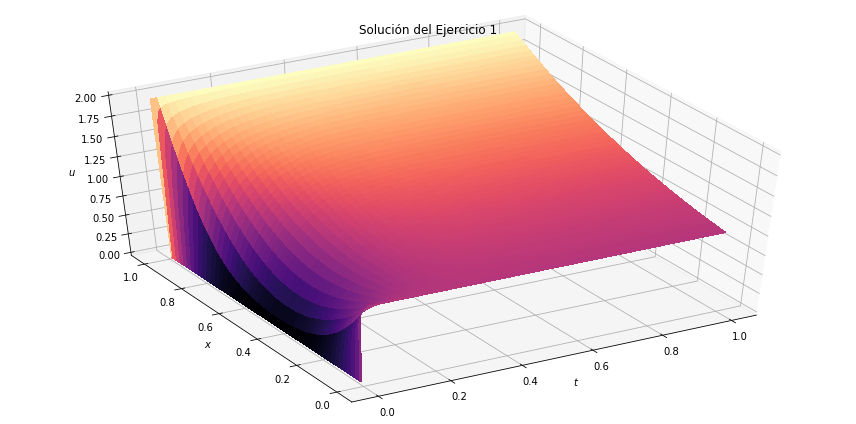

In [7]:
M = 100
N = 200
x0 = 0
xL = 1
dx = ( xL - x0 )/( M - 1 )
t0 = 0
tF = 1
dt = ( tF - t0 )/( N - 1 )
D = 1 
α = -1 
r = dt*D/dx**2
s = dt*α
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)
main_diag = ( 1 + 2*r - s )*np.ones( ( 1, M - 2 ) )
off_diag = -r*np.ones( ( 1, M - 3 ) )
a = main_diag.shape[ 1 ]
diagonals = [ main_diag, off_diag, off_diag ]
A = sparse.diags( diagonals, [ 0, -1, 1 ], shape = ( a, a ) ).toarray()
U = np.zeros( ( M, N ) )
U[ :, 0 ] = 0.0
U[ 0, : ] = 1.0 
U[ -1, : ] = 2.0 
for k in range(1, N):
  c = np.zeros( ( M - 4, 1 ) ).ravel()
  b = np.asarray( [ r*U[ 0, k ], r*U[ -1, k ] ] )
  b1 = np.insert( b, 1, c )
  b2 = np.array( U [ 1 : M - 1, k - 1 ] )
  B = b1 + b2  
  U[ 1 : M - 1, k ] = np.linalg.solve( A, B ) 

g = np.allclose( np.dot( A, U[ 1 : M - 1, N - 1 ] ), B )
print( g )
X, T = np.meshgrid( tspan, xspan )
fig = plt.figure( figsize = ( 12, 6 ) )
ax = fig.gca( projection = "3d" )
surf = ax.plot_surface( X, T, U, linewidth = 0,cmap = cm.magma, antialiased = False )
ax.set_title( "Solución del Ejercicio 1" )
ax.set_xlabel( "$t$" )
ax.set_ylabel( "$x$" )
ax.set_zlabel( "$u$" )
plt.tight_layout()
ax.view_init( elev = 45, azim = -120 )
plt.show()

PROBLEMA 2


Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


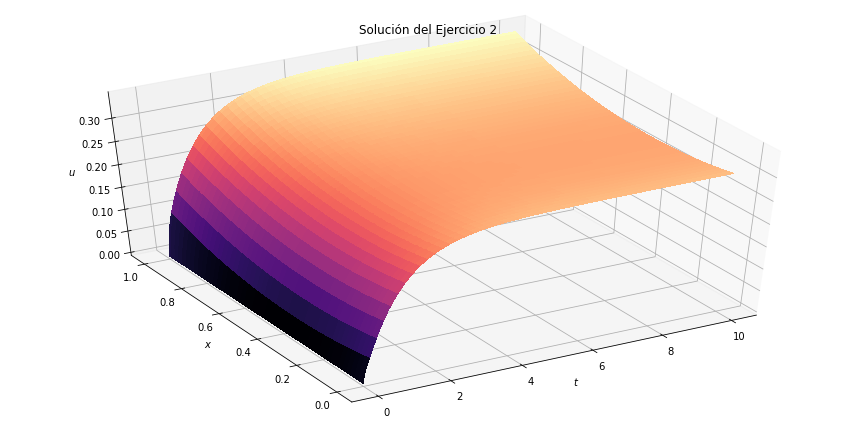

In [8]:
M = 100 
N = 300 
x0 = 0
xL = 1
dx = ( xL - x0 )/( M - 1 )
t0 = 0
tF = 10
dt = ( tF - t0 )/( N - 1 )
D = 1 
α = -1 
r = dt*D/dx**2
s = dt*α
p = 1 + 2*r - s
xspan = np.linspace( x0, xL, M )
tspan = np.linspace( t0, tF, N ) 
main_diag = p*np.ones( ( 1, M ) )
off_diag = -r*np.ones( ( 1, M - 1 ) )
a = main_diag.shape[ 1 ]
diagonals = [ main_diag, off_diag, off_diag ]
A = sparse.diags( diagonals, [ 0, -1, 1 ], shape = ( a, a ) ).toarray()
A[ 0, 1 ] = -2*r
A[ M - 1, M - 2 ] = -2*r
U = np.zeros( ( M, N ) )
U[:,0] = 0.0
f = 0.1*np.ones( [ N + 1, 1 ] ) 
g = 0.2*np.ones( [ N + 1, 1 ] ) 

for k in range(1, N):
  c = np.zeros( ( M - 2, 1 ) ).ravel()
  b = np.asarray( [ 2*r*dx*f[ k ], 2*r*dx*g[ k ] ] )
  b1 = np.insert( b, 1, c )
  b2 = np.array( U[ 0 : M, k - 1 ] )
  B = b1 + b2 

  U[0:M, k] = np.linalg.solve(A,B) 
gc = np.allclose( np.dot( A, U[ 0 : M, N - 1 ] ), B )
print( gc )
X, T = np.meshgrid( tspan, xspan )
fig = plt.figure( figsize = ( 12, 6 ) )
ax = fig.gca( projection = "3d" )
surf = ax.plot_surface( X, T, U, linewidth = 0, cmap = cm.magma , antialiased = False )
ax.set_title( "Solución del Ejercicio 2" )
ax.set_xlabel( "$t$" )
ax.set_ylabel( "$x$" )
ax.set_zlabel( "$u$" ) 
plt.tight_layout()
ax.view_init( elev = 45, azim = -120 )
plt.show()

PROBLEMA 3

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

True


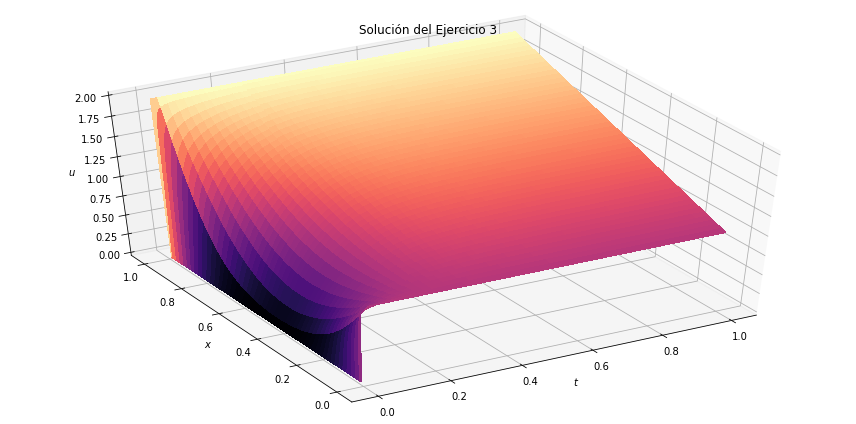

In [9]:
M = 100 
N = 300 
x0 = 0
xL = 1
dx = (xL - x0)/(M - 1)
t0 = 0
tF = 1
dt = (tF - t0)/(N - 1)
D = 1 
α = 0 
r = dt*D/dx**2
s = dt*α;
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)
main_diag = ( 1 + 2*r - s )*np.ones( ( 1, M - 2 ) )
off_diag = -r*np.ones( ( 1, M -3 ) )
a = main_diag.shape[ 1 ]
diagonals = [ main_diag, off_diag, off_diag ]
A = sparse.diags( diagonals, [ 0, -1, 1 ], shape = ( a, a ) ).toarray()
U = np.zeros( ( M, N ) )
U[:,0] = 0.0 
U[ 0, : ] = 1.0 
U[ -1, : ] = 2.0 

for k in range(1, N):
  c = np.zeros( ( M - 4, 1 ) ).ravel()
  b = np.asarray( [ r*U[ 0, k ], r*U[ -1, k ] ] )
  b1 = np.insert( b, 1, c )
  b2 = np.array( U[ 1 : M - 1, k - 1 ] )
  B = b1 + b2  
  U[ 1 : M - 1, k ] = np.linalg.solve( A, B ) 
g = np.allclose( np.dot(A, U[ 1 : M - 1, N - 1 ] ), B )
print( g )

X, T = np.meshgrid( tspan, xspan )
fig = plt.figure( figsize = ( 12, 6 ) )
ax = fig.gca( projection = "3d" )
surf = ax.plot_surface( X, T, U, linewidth = 0, cmap = cm.magma , antialiased = False )
ax.set_title( "Solución del Ejercicio 3" )
ax.set_xlabel( "$t$" )
ax.set_ylabel( "$x$" )
ax.set_zlabel( "$u$" ) 
plt.tight_layout()
ax.view_init( elev = 45, azim = -120 )
plt.show()